In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import numpy as np
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.callbacks import ModelCheckpoint
import cv2 
import os
import glob
import scipy

In [70]:
def directory():
    train_dir = "/content/drive/MyDrive/mask/Dataset/Traffic sign/Training"
    test_dir = "/content/drive/MyDrive/mask/Dataset/Traffic sign/Testing"
    return train_dir,test_dir
train_dir,test_dir=directory()

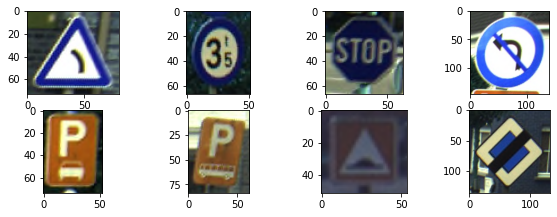

In [71]:
fig = plt.figure(figsize=(10, 7)) 
  
# setting values to rows and column variables 
rows = 4
columns = 4
  
# reading images 
Image1 = cv2.imread('/content/drive/MyDrive/mask/Dataset/Traffic sign/Testing/00003/02184_00000.ppm') 
Image2 = cv2.imread('/content/drive/MyDrive/mask/Dataset/Traffic sign/Testing/00024/00328_00001.ppm') 
Image3 = cv2.imread('/content/drive/MyDrive/mask/Dataset/Traffic sign/Testing/00021/00047_00002.ppm') 
Image4 = cv2.imread('/content/drive/MyDrive/mask/Dataset/Traffic sign/Testing/00029/00011_00000.ppm') 
Image5 = cv2.imread('/content/drive/MyDrive/mask/Dataset/Traffic sign/Testing/00047/00073_00002.ppm') 
Image6 = cv2.imread('/content/drive/MyDrive/mask/Dataset/Traffic sign/Testing/00049/00128_00001.ppm') 
Image7 = cv2.imread('/content/drive/MyDrive/mask/Dataset/Traffic sign/Testing/00059/01985_00000.ppm') 
Image8 = cv2.imread('/content/drive/MyDrive/mask/Dataset/Traffic sign/Testing/00060/00552_00001.ppm')
   
fig.add_subplot(rows, columns, 1) 
plt.imshow(Image1)  
fig.add_subplot(rows, columns, 2) 
plt.imshow(Image2) 
fig.add_subplot(rows, columns, 3) 
plt.imshow(Image3) 
fig.add_subplot(rows, columns, 4) 
plt.imshow(Image4) 
fig.add_subplot(rows, columns, 5) 
plt.imshow(Image5)  
fig.add_subplot(rows, columns, 6) 
plt.imshow(Image6) 
fig.add_subplot(rows, columns, 7) 
plt.imshow(Image7) 
fig.add_subplot(rows, columns, 8) 
plt.imshow(Image8) 


In [72]:


def preprocess(train_dir,test_dir,batch_size,target_size,rescale,zoom_range,vertical_flip):
    train_datagen=ImageDataGenerator(rescale=rescale,zoom_range=zoom_range ,vertical_flip=vertical_flip)
    test_datagen=ImageDataGenerator(rescale=rescale)
    train_generator = train_datagen.flow_from_directory(train_dir,target_size=target_size,batch_size=batch_size,class_mode='categorical')

    test_generator = test_datagen.flow_from_directory(test_dir,target_size=target_size,batch_size=batch_size,class_mode='categorical'  )


    return train_generator,test_generator

    
train_set,test_set=preprocess(train_dir,test_dir,batch_size=28,target_size=(150,150),rescale=1./255.,zoom_range=0.3,vertical_flip=True)



Found 4575 images belonging to 62 classes.
Found 2520 images belonging to 62 classes.


In [73]:

def model(input_shape,activation,lr):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (5, 5), activation='relu',padding='same',input_shape=(150, 150, 3)))
    model.add(layers.Conv2D(64, (5,5), activation='relu',padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(512, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.2))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(62, activation='softmax'))
    model.compile(optimizer=optimizers.RMSprop(lr=lr),loss='categorical_crossentropy',metrics=['accuracy'])
    return model
model=model(input_shape=(150,150,3),activation='relu',lr=0.0008)

In [74]:
def train(train_set,epochs,batch_size):
    
    history = model.fit_generator(train_set,  
           epochs=epochs)
    return history


train_history=train(train_set,epochs=45,batch_size=64)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/45
164/164 [==============================] - 34s 202ms/step - loss: 5.0104 - accuracy: 0.1120
Epoch 2/45
164/164 [==============================] - 33s 203ms/step - loss: 2.3916 - accuracy: 0.3812
Epoch 3/45
164/164 [==============================] - 33s 200ms/step - loss: 1.6635 - accuracy: 0.5269
Epoch 4/45
164/164 [==============================] - 33s 199ms/step - loss: 1.2506 - accuracy: 0.6678
Epoch 5/45
164/164 [==============================] - 33s 202ms/step - loss: 0.9240 - accuracy: 0.7432
Epoch 6/45
164/164 [==============================] - 33s 199ms/step - loss: 0.6851 - accuracy: 0.8107
Epoch 7/45
164/164 [==============================] - 33s 202ms/step - loss: 0.5454 - accuracy: 0.8485
Epoch 8/45
164/164 [==============================] - 33s 201ms/step - loss: 0.4761 - accuracy: 0.8747
Epoch 9/45
164/164 [==============================] - 34s 205ms/step - loss: 0.4241 - accuracy: 0.8901
Epoch 10/45
164/164 [==============================] - 33s 200ms/step - l

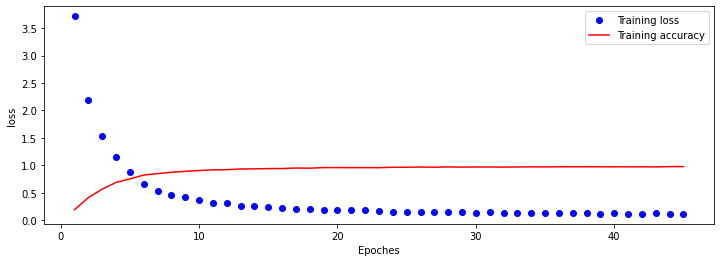

In [75]:
def plot(history,figsize,y,x):
    history_dict=history.history
    loss=history_dict[y]
    acc=history_dict[x]
    epoch=range(1,len(acc)+1)
    plt.figure(figsize=figsize)
    plt.plot(epoch,loss,'bo',label='Training loss')
    plt.plot(epoch,acc,'r',label='Training accuracy')
    plt.xlabel('Epoches')
    plt.ylabel('loss')
    plt.legend()
plot(train_history,(12,4),y='loss',x='accuracy')


In [76]:
def test(test_set):
    results = model.evaluate(test_set)
    return results

results=test(test_set)
print("test set resulat is",results)


90/90 [==============================] - 5s 50ms/step - loss: 0.2525 - accuracy: 0.9619
test set resulat is [0.2525266408920288, 0.961904764175415]


In [77]:
def save(name):
     model.save(name)

save("trafic sign")

INFO:tensorflow:Assets written to: trafic sign/assets
